# Probability Basics: A Comprehensive Guide

## Table of Contents
1. [Introduction to Probability](#intro)
2. [Sample Spaces and Events](#sample-space)
3. [Axioms of Probability](#axioms)
4. [Conditional Probability](#conditional)
5. [Bayes' Theorem](#bayes)
6. [Independence](#independence)
7. [Random Variables](#random-variables)
8. [Probability Distributions](#distributions)
9. [Expected Value and Variance](#expectation)
10. [Common Discrete Distributions](#discrete-distributions)
11. [Common Continuous Distributions](#continuous-distributions)
12. [Central Limit Theorem](#clt)
13. [Monte Carlo Simulation](#monte-carlo)
14. [Real-World Applications](#applications)

---

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import comb
import pandas as pd
from collections import Counter
from itertools import combinations, permutations
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)
np.set_printoptions(precision=4, suppress=True)

## 1. Introduction to Probability <a name="intro"></a>

### What is Probability?

Probability is a measure of the likelihood that an event will occur. It's a number between 0 and 1:
- **0** means the event is impossible
- **1** means the event is certain
- **0.5** means the event has equal chances of occurring or not

### Why Study Probability?

1. **Uncertainty quantification**: Make decisions under uncertainty
2. **Data Science & ML**: Foundation for statistics and machine learning
3. **Real-world applications**: Finance, insurance, games, AI
4. **Scientific reasoning**: Understanding randomness in nature

### Key Concepts

- **Experiment**: An action or process that leads to one of several possible outcomes
- **Outcome**: A possible result of an experiment
- **Event**: A set of outcomes
- **Sample Space**: The set of all possible outcomes

---

## 2. Sample Spaces and Events <a name="sample-space"></a>

### Sample Space (Ω or S)

The **sample space** is the set of all possible outcomes of an experiment.

**Examples**:
- Coin flip: $S = \{H, T\}$
- Die roll: $S = \{1, 2, 3, 4, 5, 6\}$
- Two coin flips: $S = \{HH, HT, TH, TT\}$

### Events

An **event** is a subset of the sample space.

**Examples** (for a die roll):
- "Roll an even number": $A = \{2, 4, 6\}$
- "Roll greater than 4": $B = \{5, 6\}$
- "Roll a 3": $C = \{3\}$

In [2]:
# Example: Simulating dice rolls
def roll_die(n_rolls=1):
    """Simulate rolling a fair 6-sided die."""
    return np.random.randint(1, 7, size=n_rolls)

# Single roll
print("Single die roll:")
print(roll_die())

# Multiple rolls
print("\n10 die rolls:")
rolls = roll_die(10)
print(rolls)

# Define sample space
sample_space = {1, 2, 3, 4, 5, 6}
print(f"\nSample space S: {sample_space}")

# Define events
event_even = {2, 4, 6}
event_greater_than_4 = {5, 6}
event_prime = {2, 3, 5}

print(f"\nEvent A (even numbers): {event_even}")
print(f"Event B (> 4): {event_greater_than_4}")
print(f"Event C (prime numbers): {event_prime}")

Single die roll:
[4]

10 die rolls:
[5 3 5 5 2 3 3 3 5 4]

Sample space S: {1, 2, 3, 4, 5, 6}

Event A (even numbers): {2, 4, 6}
Event B (> 4): {5, 6}
Event C (prime numbers): {2, 3, 5}


Simulating 10,000 die rolls:

Outcome | Count | Frequency | Theoretical
--------------------------------------------------
   1    |  1666 | 0.1666    | 0.1667
   2    |  1695 | 0.1695    | 0.1667
   3    |  1623 | 0.1623    | 0.1667
   4    |  1671 | 0.1671    | 0.1667
   5    |  1686 | 0.1686    | 0.1667
   6    |  1659 | 0.1659    | 0.1667


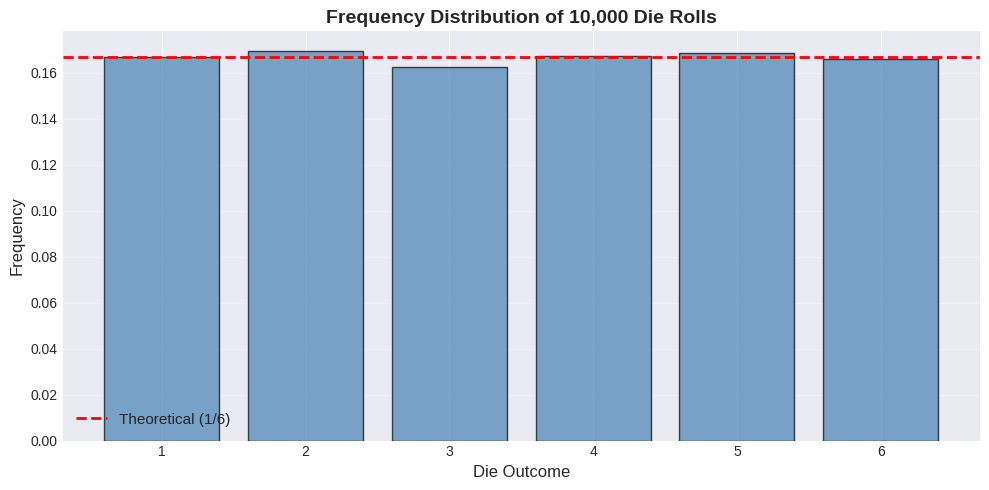

In [3]:
# Simulate many rolls and visualize
n_rolls = 10000
rolls = roll_die(n_rolls)

# Count frequencies
unique, counts = np.unique(rolls, return_counts=True)
frequencies = counts / n_rolls

print(f"Simulating {n_rolls:,} die rolls:")
print("\nOutcome | Count | Frequency | Theoretical")
print("-" * 50)
for outcome, count, freq in zip(unique, counts, frequencies):
    print(f"   {outcome}    | {count:5d} | {freq:.4f}    | {1/6:.4f}")

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(unique, frequencies, alpha=0.7, color='steelblue', edgecolor='black')
plt.axhline(y=1/6, color='red', linestyle='--', linewidth=2, label='Theoretical (1/6)')
plt.xlabel('Die Outcome', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Frequency Distribution of {n_rolls:,} Die Rolls', fontsize=14, fontweight='bold')
plt.xticks(unique)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 3. Axioms of Probability <a name="axioms"></a>

The **Kolmogorov Axioms** form the foundation of probability theory:

### Axiom 1: Non-negativity
$$P(A) \geq 0 \text{ for any event } A$$

### Axiom 2: Unit measure
$$P(S) = 1 \text{ (probability of the entire sample space is 1)}$$

### Axiom 3: Additivity
For mutually exclusive events $A_1, A_2, ...$:
$$P(A_1 \cup A_2 \cup ...) = P(A_1) + P(A_2) + ...$$

### Important Properties (derived from axioms)

1. **Complement Rule**: $P(A^c) = 1 - P(A)$
2. **Addition Rule**: $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
3. **Impossible Event**: $P(\emptyset) = 0$
4. **Monotonicity**: If $A \subseteq B$, then $P(A) \leq P(B)$

In [4]:
# Demonstrating probability axioms with dice
n_trials = 100000
rolls = roll_die(n_trials)

# Define events
A = rolls % 2 == 0  # Even numbers
B = rolls > 4       # Greater than 4
C = rolls <= 3      # Less than or equal to 3

# Calculate probabilities
P_A = np.mean(A)
P_B = np.mean(B)
P_C = np.mean(C)
P_S = 1.0  # Entire sample space

print("Axiom 1: Non-negativity")
print(f"P(A) = {P_A:.4f} ≥ 0 ✓")
print(f"P(B) = {P_B:.4f} ≥ 0 ✓")

print("\nAxiom 2: Unit measure")
print(f"P(S) = {P_S:.4f} = 1 ✓")

print("\nAxiom 3: Additivity (for mutually exclusive events)")
# C and B are mutually exclusive (no overlap)
P_C_union_B = np.mean(C | B)
P_C_plus_B = P_C + P_B
print(f"P(C ∪ B) = {P_C_union_B:.4f}")
print(f"P(C) + P(B) = {P_C:.4f} + {P_B:.4f} = {P_C_plus_B:.4f}")
print(f"Difference: {abs(P_C_union_B - P_C_plus_B):.6f} ≈ 0 ✓")

print("\n" + "="*60)
print("Derived Properties")
print("="*60)

# Complement rule
P_A_complement = np.mean(~A)
print(f"\nComplement Rule:")
print(f"P(A) = {P_A:.4f}")
print(f"P(A^c) = {P_A_complement:.4f}")
print(f"P(A) + P(A^c) = {P_A + P_A_complement:.4f} = 1 ✓")

# Addition rule
P_A_or_B = np.mean(A | B)
P_A_and_B = np.mean(A & B)
print(f"\nAddition Rule:")
print(f"P(A ∪ B) = {P_A_or_B:.4f}")
print(f"P(A) + P(B) - P(A ∩ B) = {P_A:.4f} + {P_B:.4f} - {P_A_and_B:.4f}")
print(f"                        = {P_A + P_B - P_A_and_B:.4f}")
print(f"Difference: {abs(P_A_or_B - (P_A + P_B - P_A_and_B)):.6f} ≈ 0 ✓")

Axiom 1: Non-negativity
P(A) = 0.5010 ≥ 0 ✓
P(B) = 0.3349 ≥ 0 ✓

Axiom 2: Unit measure
P(S) = 1.0000 = 1 ✓

Axiom 3: Additivity (for mutually exclusive events)
P(C ∪ B) = 0.8330
P(C) + P(B) = 0.4981 + 0.3349 = 0.8330
Difference: 0.000000 ≈ 0 ✓

Derived Properties

Complement Rule:
P(A) = 0.5010
P(A^c) = 0.4990
P(A) + P(A^c) = 1.0000 = 1 ✓

Addition Rule:
P(A ∪ B) = 0.6691
P(A) + P(B) - P(A ∩ B) = 0.5010 + 0.3349 - 0.1668
                        = 0.6691
Difference: 0.000000 ≈ 0 ✓


## 4. Conditional Probability <a name="conditional"></a>

### Definition

The **conditional probability** of event $A$ given event $B$ is:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

provided $P(B) > 0$.

### Intuition

"What's the probability of $A$ happening, given that we **know** $B$ has happened?"

We restrict our sample space to only those outcomes where $B$ is true.

### Example: Drawing Cards

What's the probability of drawing an Ace given that we drew a red card?

- $P(\text{Ace}) = \frac{4}{52}$
- $P(\text{Ace} | \text{Red}) = \frac{2}{26} = \frac{1}{13}$

(Only 2 red aces out of 26 red cards)

In [5]:
# Simulate drawing cards
def create_deck():
    """Create a standard deck of 52 cards."""
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    deck = [(rank, suit) for suit in suits for rank in ranks]
    return deck

# Simulate many draws
n_draws = 100000
deck = create_deck()

ace_count = 0
red_count = 0
ace_and_red_count = 0

for _ in range(n_draws):
    card = deck[np.random.randint(0, 52)]
    rank, suit = card
    
    is_ace = (rank == 'A')
    is_red = (suit in ['Hearts', 'Diamonds'])
    
    if is_ace:
        ace_count += 1
    if is_red:
        red_count += 1
    if is_ace and is_red:
        ace_and_red_count += 1

# Calculate probabilities
P_ace = ace_count / n_draws
P_red = red_count / n_draws
P_ace_and_red = ace_and_red_count / n_draws
P_ace_given_red = ace_and_red_count / red_count

print(f"Simulation with {n_draws:,} draws:")
print("\n" + "="*60)
print("Basic Probabilities:")
print("="*60)
print(f"P(Ace) = {P_ace:.4f} (theoretical: {4/52:.4f})")
print(f"P(Red) = {P_red:.4f} (theoretical: {26/52:.4f})")
print(f"P(Ace ∩ Red) = {P_ace_and_red:.4f} (theoretical: {2/52:.4f})")

print("\n" + "="*60)
print("Conditional Probability:")
print("="*60)
print(f"P(Ace | Red) = {P_ace_given_red:.4f}")
print(f"Using formula: P(Ace ∩ Red) / P(Red) = {P_ace_and_red:.4f} / {P_red:.4f}")
print(f"             = {P_ace_and_red / P_red:.4f}")
print(f"Theoretical: {2/26:.4f}")

Simulation with 100,000 draws:

Basic Probabilities:
P(Ace) = 0.0790 (theoretical: 0.0769)
P(Red) = 0.5031 (theoretical: 0.5000)
P(Ace ∩ Red) = 0.0399 (theoretical: 0.0385)

Conditional Probability:
P(Ace | Red) = 0.0794
Using formula: P(Ace ∩ Red) / P(Red) = 0.0399 / 0.5031
             = 0.0794
Theoretical: 0.0769


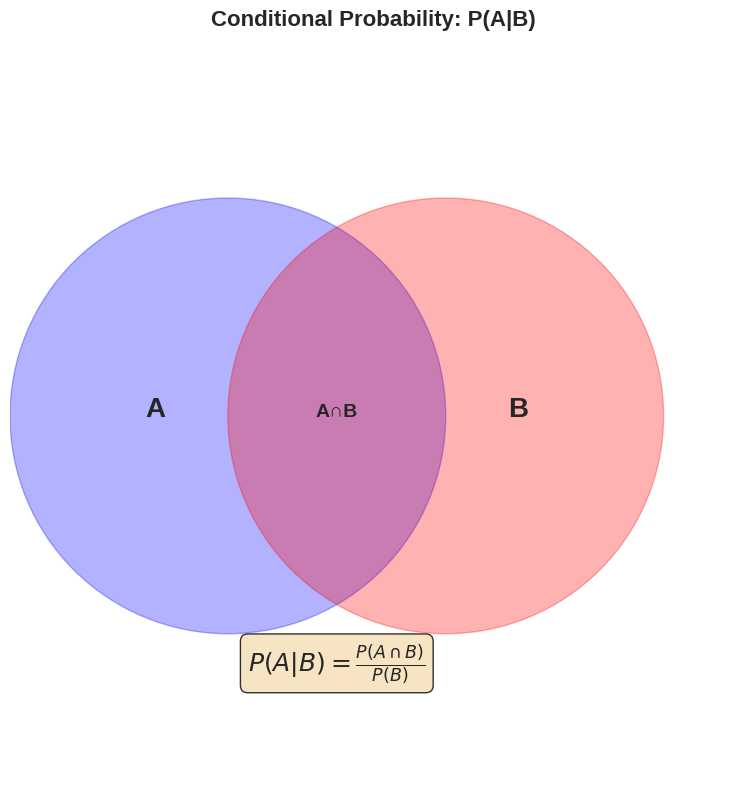

In [6]:
# Visualize conditional probability with Venn diagram
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create circles for events
circle1 = Circle((0.3, 0.5), 0.3, alpha=0.3, color='blue', label='Event A')
circle2 = Circle((0.6, 0.5), 0.3, alpha=0.3, color='red', label='Event B')

ax.add_patch(circle1)
ax.add_patch(circle2)

# Add labels
ax.text(0.2, 0.5, 'A', fontsize=20, ha='center', fontweight='bold')
ax.text(0.7, 0.5, 'B', fontsize=20, ha='center', fontweight='bold')
ax.text(0.45, 0.5, 'A∩B', fontsize=14, ha='center', fontweight='bold')

# Add formulas
ax.text(0.45, 0.15, r'$P(A|B) = \frac{P(A \cap B)}{P(B)}$', 
       fontsize=18, ha='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Conditional Probability: P(A|B)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 5. Bayes' Theorem <a name="bayes"></a>

### The Theorem

**Bayes' Theorem** is one of the most important results in probability:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Or equivalently:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|A^c) \cdot P(A^c)}$$

### Terminology

- $P(A)$: **Prior probability** (before seeing evidence)
- $P(B|A)$: **Likelihood** (probability of evidence given hypothesis)
- $P(A|B)$: **Posterior probability** (after seeing evidence)
- $P(B)$: **Marginal probability** (total probability of evidence)

### Classic Example: Medical Testing

A disease affects 1% of the population. A test is 95% accurate (both sensitivity and specificity). If you test positive, what's the probability you have the disease?

In [7]:
# Medical test example
print("="*70)
print("MEDICAL TEST PROBLEM")
print("="*70)

# Given information
P_disease = 0.01          # Prior: 1% have disease
P_pos_given_disease = 0.95    # Sensitivity: 95% true positive rate
P_pos_given_no_disease = 0.05  # False positive rate: 5%

print("\nGiven Information:")
print(f"P(Disease) = {P_disease:.2%}")
print(f"P(Positive | Disease) = {P_pos_given_disease:.2%} (sensitivity)")
print(f"P(Positive | No Disease) = {P_pos_given_no_disease:.2%} (false positive rate)")

# Calculate using Bayes' theorem
P_no_disease = 1 - P_disease

# P(Positive) using law of total probability
P_positive = (P_pos_given_disease * P_disease + 
              P_pos_given_no_disease * P_no_disease)

# P(Disease | Positive) using Bayes' theorem
P_disease_given_pos = (P_pos_given_disease * P_disease) / P_positive

print("\n" + "="*70)
print("CALCULATION:")
print("="*70)
print(f"\nP(Positive) = P(Pos|Disease)×P(Disease) + P(Pos|No Disease)×P(No Disease)")
print(f"            = {P_pos_given_disease}×{P_disease} + {P_pos_given_no_disease}×{P_no_disease}")
print(f"            = {P_positive:.4f}")

print(f"\nP(Disease | Positive) = P(Positive | Disease) × P(Disease) / P(Positive)")
print(f"                      = {P_pos_given_disease} × {P_disease} / {P_positive:.4f}")
print(f"                      = {P_disease_given_pos:.4f}")

print("\n" + "="*70)
print("RESULT:")
print("="*70)
print(f"\nIf you test POSITIVE, probability of having disease: {P_disease_given_pos:.2%}")
print(f"\n⚠️  Despite 95% test accuracy, only {P_disease_given_pos:.1%} of positive tests")
print(f"   indicate actual disease due to low base rate (1%)!")

MEDICAL TEST PROBLEM

Given Information:
P(Disease) = 1.00%
P(Positive | Disease) = 95.00% (sensitivity)
P(Positive | No Disease) = 5.00% (false positive rate)

CALCULATION:

P(Positive) = P(Pos|Disease)×P(Disease) + P(Pos|No Disease)×P(No Disease)
            = 0.95×0.01 + 0.05×0.99
            = 0.0590

P(Disease | Positive) = P(Positive | Disease) × P(Disease) / P(Positive)
                      = 0.95 × 0.01 / 0.0590
                      = 0.1610

RESULT:

If you test POSITIVE, probability of having disease: 16.10%

⚠️  Despite 95% test accuracy, only 16.1% of positive tests
   indicate actual disease due to low base rate (1%)!


In [8]:
# Simulate the medical test scenario
def simulate_medical_test(n_people=100000):
    """
    Simulate medical testing on a population.
    """
    # Generate population
    has_disease = np.random.rand(n_people) < 0.01
    
    # Simulate test results
    test_positive = np.zeros(n_people, dtype=bool)
    
    # For people with disease: 95% test positive
    test_positive[has_disease] = np.random.rand(np.sum(has_disease)) < 0.95
    
    # For people without disease: 5% test positive (false positive)
    test_positive[~has_disease] = np.random.rand(np.sum(~has_disease)) < 0.05
    
    # Calculate statistics
    n_positive_tests = np.sum(test_positive)
    n_positive_with_disease = np.sum(test_positive & has_disease)
    
    return has_disease, test_positive

# Run simulation
n_people = 100000
has_disease, test_positive = simulate_medical_test(n_people)

# Calculate empirical probabilities
n_positive = np.sum(test_positive)
n_disease_and_positive = np.sum(has_disease & test_positive)
empirical_prob = n_disease_and_positive / n_positive

print(f"\nSimulation with {n_people:,} people:")
print(f"\nPeople with disease: {np.sum(has_disease):,}")
print(f"People testing positive: {n_positive:,}")
print(f"True positives (disease AND positive test): {n_disease_and_positive:,}")
print(f"False positives: {n_positive - n_disease_and_positive:,}")
print(f"\nEmpirical P(Disease | Positive) = {empirical_prob:.4f}")
print(f"Theoretical P(Disease | Positive) = {P_disease_given_pos:.4f}")
print(f"Difference: {abs(empirical_prob - P_disease_given_pos):.6f}")


Simulation with 100,000 people:

People with disease: 946
People testing positive: 5,925
True positives (disease AND positive test): 900
False positives: 5,025

Empirical P(Disease | Positive) = 0.1519
Theoretical P(Disease | Positive) = 0.1610
Difference: 0.009118


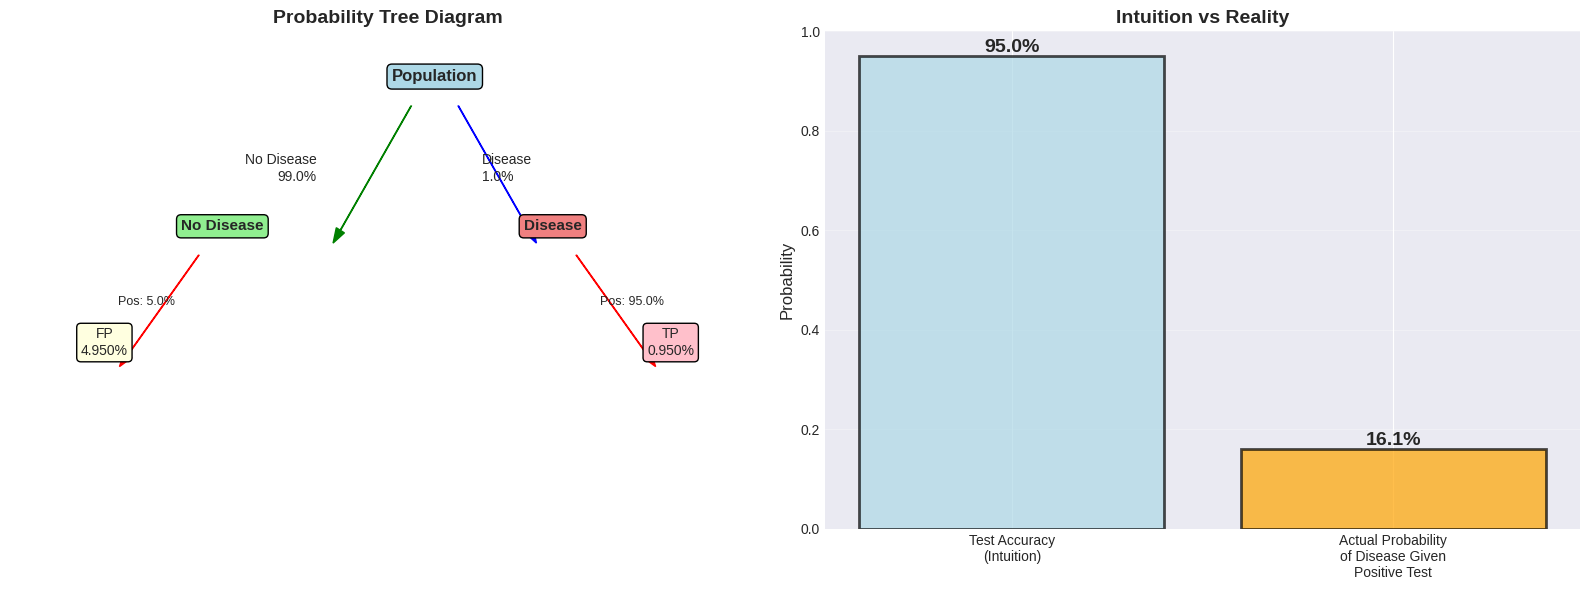

In [9]:
# Visualize the medical test scenario
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tree diagram probabilities
ax = axes[0]
ax.text(0.1, 0.9, 'Population', fontsize=12, ha='center', fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='lightblue'))

# Disease branch
ax.arrow(0.15, 0.85, 0.15, -0.25, head_width=0.02, head_length=0.03, fc='blue', ec='blue')
ax.text(0.2, 0.7, f'Disease\n{P_disease:.1%}', fontsize=10, ha='left')
ax.text(0.35, 0.6, 'Disease', fontsize=11, ha='center', fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='lightcoral'))

# No disease branch
ax.arrow(0.05, 0.85, -0.15, -0.25, head_width=0.02, head_length=0.03, fc='green', ec='green')
ax.text(-0.15, 0.7, f'No Disease\n{P_no_disease:.1%}', fontsize=10, ha='right')
ax.text(-0.35, 0.6, 'No Disease', fontsize=11, ha='center', fontweight='bold',
       bbox=dict(boxstyle='round', facecolor='lightgreen'))

# Test results for disease
ax.arrow(0.4, 0.55, 0.15, -0.2, head_width=0.02, head_length=0.03, fc='red', ec='red')
ax.text(0.45, 0.45, f'Pos: {P_pos_given_disease:.1%}', fontsize=9)
ax.text(0.6, 0.35, f'TP\n{P_disease*P_pos_given_disease:.3%}', fontsize=10, ha='center',
       bbox=dict(boxstyle='round', facecolor='pink'))

# Test results for no disease  
ax.arrow(-0.4, 0.55, -0.15, -0.2, head_width=0.02, head_length=0.03, fc='red', ec='red')
ax.text(-0.45, 0.45, f'Pos: {P_pos_given_no_disease:.1%}', fontsize=9, ha='right')
ax.text(-0.6, 0.35, f'FP\n{P_no_disease*P_pos_given_no_disease:.3%}', fontsize=10, ha='center',
       bbox=dict(boxstyle='round', facecolor='lightyellow'))

ax.set_xlim(-0.8, 0.8)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Probability Tree Diagram', fontsize=14, fontweight='bold')

# Bar chart comparing intuition vs reality
ax = axes[1]
categories = ['Test Accuracy\n(Intuition)', 'Actual Probability\nof Disease Given\nPositive Test']
values = [0.95, P_disease_given_pos]
colors = ['lightblue', 'orange']

bars = ax.bar(categories, values, color=colors, edgecolor='black', linewidth=2, alpha=0.7)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Intuition vs Reality', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{val:.1%}',
           ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Independence <a name="independence"></a>

### Definition

Two events $A$ and $B$ are **independent** if:

$$P(A \cap B) = P(A) \cdot P(B)$$

Equivalently:
$$P(A|B) = P(A)$$

### Intuition

Knowing that $B$ occurred doesn't change the probability of $A$.

### Examples

**Independent**:
- Coin flip results
- Rolling two dice
- Drawing cards **with replacement**

**NOT Independent**:
- Drawing cards without replacement
- Weather on consecutive days
- Student's test scores in related subjects

In [10]:
# Example: Independence vs Dependence
n_trials = 100000

print("="*70)
print("INDEPENDENT EVENTS: Two Coin Flips")
print("="*70)

# Simulate two independent coin flips
coin1 = np.random.randint(0, 2, n_trials)  # 0=Tails, 1=Heads
coin2 = np.random.randint(0, 2, n_trials)

P_coin1_heads = np.mean(coin1)
P_coin2_heads = np.mean(coin2)
P_both_heads = np.mean((coin1 == 1) & (coin2 == 1))

print(f"\nP(Coin1 = Heads) = {P_coin1_heads:.4f}")
print(f"P(Coin2 = Heads) = {P_coin2_heads:.4f}")
print(f"P(Both Heads) = {P_both_heads:.4f}")
print(f"\nProduct: P(Coin1) × P(Coin2) = {P_coin1_heads * P_coin2_heads:.4f}")
print(f"Difference from P(Both): {abs(P_both_heads - P_coin1_heads * P_coin2_heads):.6f}")
print("\n✓ Independence verified: P(A ∩ B) = P(A) × P(B)")

print("\n" + "="*70)
print("DEPENDENT EVENTS: Drawing Cards Without Replacement")
print("="*70)

# Simulate drawing 2 cards without replacement
def draw_two_cards_no_replacement():
    """Draw 2 cards without replacement."""
    deck = list(range(52))  # 0-12: clubs, 13-25: diamonds, 26-38: hearts, 39-51: spades
    np.random.shuffle(deck)
    card1, card2 = deck[0], deck[1]
    return card1 % 13, card2 % 13  # Return ranks (0=Ace, 12=King)

first_aces = 0
second_aces = 0
both_aces = 0

for _ in range(n_trials):
    rank1, rank2 = draw_two_cards_no_replacement()
    if rank1 == 0:  # Ace
        first_aces += 1
    if rank2 == 0:  # Ace
        second_aces += 1
    if rank1 == 0 and rank2 == 0:
        both_aces += 1

P_first_ace = first_aces / n_trials
P_second_ace = second_aces / n_trials
P_both_aces = both_aces / n_trials

print(f"\nP(First card = Ace) = {P_first_ace:.4f} (theoretical: {4/52:.4f})")
print(f"P(Second card = Ace) = {P_second_ace:.4f} (theoretical: {4/52:.4f})")
print(f"P(Both Aces) = {P_both_aces:.4f}")
print(f"\nIf independent: P(Both) = {P_first_ace * P_second_ace:.4f}")
print(f"Actual P(Both Aces) = {P_both_aces:.4f}")
print(f"Theoretical P(Both) = {(4/52) * (3/51):.4f}")
print(f"\n✗ NOT independent: P(A ∩ B) ≠ P(A) × P(B)")
print(f"   (Drawing first ace changes probability of second ace)")

INDEPENDENT EVENTS: Two Coin Flips

P(Coin1 = Heads) = 0.4991
P(Coin2 = Heads) = 0.5001
P(Both Heads) = 0.2498

Product: P(Coin1) × P(Coin2) = 0.2496
Difference from P(Both): 0.000165

✓ Independence verified: P(A ∩ B) = P(A) × P(B)

DEPENDENT EVENTS: Drawing Cards Without Replacement

P(First card = Ace) = 0.0745 (theoretical: 0.0769)
P(Second card = Ace) = 0.0771 (theoretical: 0.0769)
P(Both Aces) = 0.0045

If independent: P(Both) = 0.0057
Actual P(Both Aces) = 0.0045
Theoretical P(Both) = 0.0045

✗ NOT independent: P(A ∩ B) ≠ P(A) × P(B)
   (Drawing first ace changes probability of second ace)


## 7. Random Variables <a name="random-variables"></a>

### Definition

A **random variable** is a function that assigns a numerical value to each outcome in a sample space.

$$X: S \rightarrow \mathbb{R}$$

### Types

1. **Discrete Random Variable**: Can take on countable values
   - Example: Number of heads in 10 coin flips, dice roll outcome

2. **Continuous Random Variable**: Can take on any value in an interval
   - Example: Height, temperature, time

### Probability Mass Function (PMF) - Discrete

$$p_X(x) = P(X = x)$$

### Probability Density Function (PDF) - Continuous

$$P(a \leq X \leq b) = \int_a^b f_X(x)dx$$

### Cumulative Distribution Function (CDF)

$$F_X(x) = P(X \leq x)$$

In [11]:
# Example: Random variable for sum of two dice
n_rolls = 100000
die1 = np.random.randint(1, 7, n_rolls)
die2 = np.random.randint(1, 7, n_rolls)
X = die1 + die2  # Random variable: sum of two dice

print("Random Variable X = Sum of Two Dice")
print("\nSample space for sum: {2, 3, 4, ..., 12}")
print(f"\nFirst 20 outcomes: {X[:20]}")

# Calculate PMF
values, counts = np.unique(X, return_counts=True)
pmf = counts / n_rolls

# Theoretical PMF
theoretical_pmf = {}
for i in range(2, 13):
    # Count ways to get sum i
    ways = 0
    for d1 in range(1, 7):
        for d2 in range(1, 7):
            if d1 + d2 == i:
                ways += 1
    theoretical_pmf[i] = ways / 36

print("\nProbability Mass Function (PMF):")
print("Value | Empirical | Theoretical")
print("-" * 40)
for val, prob in zip(values, pmf):
    print(f"  {val:2d}  |  {prob:.4f}   |   {theoretical_pmf[val]:.4f}")

Random Variable X = Sum of Two Dice

Sample space for sum: {2, 3, 4, ..., 12}

First 20 outcomes: [ 4  7  7  7  7  8  5  8  8 10  3  6  5  8  8  3  5  7  5  5]

Probability Mass Function (PMF):
Value | Empirical | Theoretical
----------------------------------------
   2  |  0.0268   |   0.0278
   3  |  0.0562   |   0.0556
   4  |  0.0849   |   0.0833
   5  |  0.1111   |   0.1111
   6  |  0.1371   |   0.1389
   7  |  0.1661   |   0.1667
   8  |  0.1402   |   0.1389
   9  |  0.1100   |   0.1111
  10  |  0.0841   |   0.0833
  11  |  0.0558   |   0.0556
  12  |  0.0277   |   0.0278


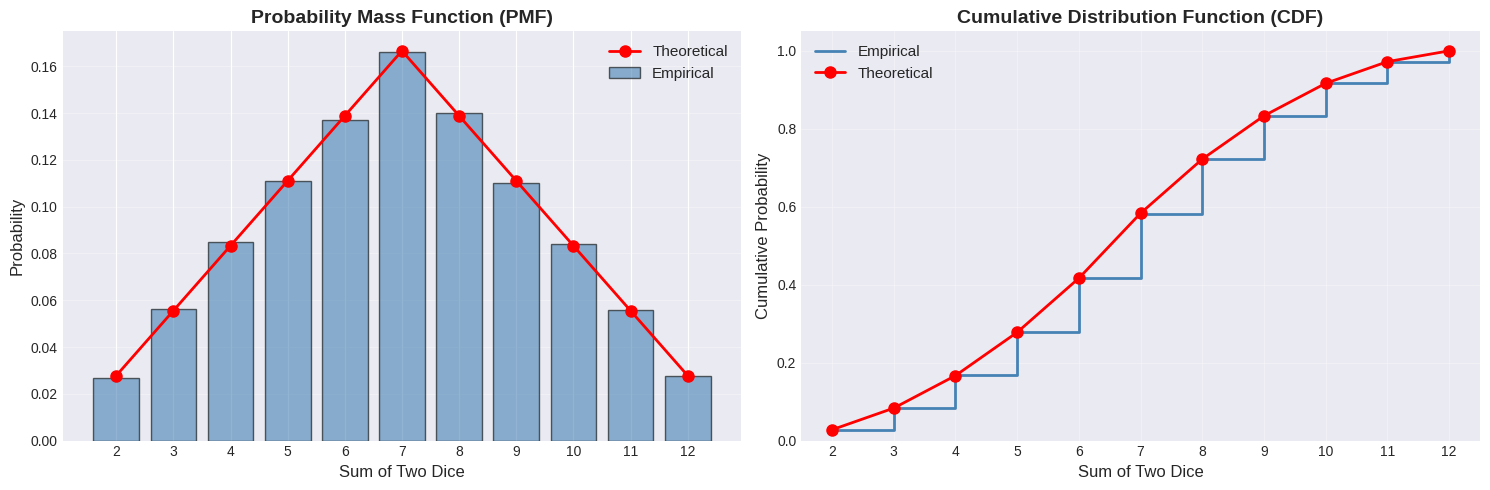

In [12]:
# Visualize PMF and CDF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PMF
ax = axes[0]
theoretical_values = list(theoretical_pmf.keys())
theoretical_probs = list(theoretical_pmf.values())

ax.bar(values, pmf, alpha=0.6, label='Empirical', color='steelblue', edgecolor='black')
ax.plot(theoretical_values, theoretical_probs, 'ro-', linewidth=2, 
       markersize=8, label='Theoretical')
ax.set_xlabel('Sum of Two Dice', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Probability Mass Function (PMF)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(values)

# CDF
ax = axes[1]
cdf_empirical = np.cumsum(pmf)
cdf_theoretical = [sum(theoretical_pmf[j] for j in range(2, i+1)) 
                  for i in theoretical_values]

ax.step(values, cdf_empirical, where='post', linewidth=2, 
       label='Empirical', color='steelblue')
ax.plot(theoretical_values, cdf_theoretical, 'ro-', linewidth=2, 
       markersize=8, label='Theoretical')
ax.set_xlabel('Sum of Two Dice', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)
ax.set_title('Cumulative Distribution Function (CDF)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(values)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

## 8. Expected Value and Variance <a name="expectation"></a>

### Expected Value (Mean)

The **expected value** or **mean** is the average value of a random variable:

**Discrete**: $E[X] = \sum_x x \cdot P(X=x)$

**Continuous**: $E[X] = \int_{-\infty}^{\infty} x \cdot f(x)dx$

### Variance

The **variance** measures the spread of the distribution:

$$\text{Var}(X) = E[(X - E[X])^2] = E[X^2] - (E[X])^2$$

### Standard Deviation

$$\sigma = \sqrt{\text{Var}(X)}$$

### Properties

1. $E[aX + b] = aE[X] + b$
2. $\text{Var}(aX + b) = a^2\text{Var}(X)$
3. For independent $X$, $Y$: $E[XY] = E[X]E[Y]$
4. For independent $X$, $Y$: $\text{Var}(X+Y) = \text{Var}(X) + \text{Var}(Y)$

In [13]:
# Calculate expected value and variance for dice sum
n_rolls = 100000
die1 = np.random.randint(1, 7, n_rolls)
die2 = np.random.randint(1, 7, n_rolls)
X = die1 + die2

# Empirical
mean_empirical = np.mean(X)
variance_empirical = np.var(X)
std_empirical = np.std(X)

# Theoretical
# E[X] = E[Die1] + E[Die2] = 3.5 + 3.5 = 7
mean_theoretical = 7

# Var(X) = Var(Die1) + Var(Die2)
# Var(Die) = E[Die^2] - (E[Die])^2 = (1+4+9+16+25+36)/6 - 3.5^2 = 35/12
var_die = (1 + 4 + 9 + 16 + 25 + 36) / 6 - 3.5**2
variance_theoretical = 2 * var_die
std_theoretical = np.sqrt(variance_theoretical)

print("="*70)
print("EXPECTED VALUE AND VARIANCE")
print("="*70)
print(f"\nRandom Variable: X = Sum of Two Dice")
print(f"Sample size: {n_rolls:,}")

print("\n" + "-"*70)
print("Metric          | Empirical | Theoretical | Difference")
print("-"*70)
print(f"Mean (μ)        |  {mean_empirical:6.4f}   |   {mean_theoretical:.4f}    |  {abs(mean_empirical - mean_theoretical):.6f}")
print(f"Variance (σ²)   |  {variance_empirical:6.4f}   |   {variance_theoretical:.4f}    |  {abs(variance_empirical - variance_theoretical):.6f}")
print(f"Std Dev (σ)     |  {std_empirical:6.4f}   |   {std_theoretical:.4f}    |  {abs(std_empirical - std_theoretical):.6f}")

# Verify properties
print("\n" + "="*70)
print("VERIFYING PROPERTIES")
print("="*70)

# Property: E[X + Y] = E[X] + E[Y]
E_die1 = np.mean(die1)
E_die2 = np.mean(die2)
print(f"\nProperty: E[X + Y] = E[X] + E[Y]")
print(f"E[Die1 + Die2] = {mean_empirical:.4f}")
print(f"E[Die1] + E[Die2] = {E_die1:.4f} + {E_die2:.4f} = {E_die1 + E_die2:.4f}")
print(f"Difference: {abs(mean_empirical - (E_die1 + E_die2)):.6f} ✓")

# Property: Var(X + Y) = Var(X) + Var(Y) for independent X, Y
var_die1 = np.var(die1)
var_die2 = np.var(die2)
print(f"\nProperty: Var(X + Y) = Var(X) + Var(Y) (for independent X, Y)")
print(f"Var(Die1 + Die2) = {variance_empirical:.4f}")
print(f"Var(Die1) + Var(Die2) = {var_die1:.4f} + {var_die2:.4f} = {var_die1 + var_die2:.4f}")
print(f"Difference: {abs(variance_empirical - (var_die1 + var_die2)):.6f} ✓")

EXPECTED VALUE AND VARIANCE

Random Variable: X = Sum of Two Dice
Sample size: 100,000

----------------------------------------------------------------------
Metric          | Empirical | Theoretical | Difference
----------------------------------------------------------------------
Mean (μ)        |  7.0087   |   7.0000    |  0.008690
Variance (σ²)   |  5.8336   |   5.8333    |  0.000261
Std Dev (σ)     |  2.4153   |   2.4152    |  0.000054

VERIFYING PROPERTIES

Property: E[X + Y] = E[X] + E[Y]
E[Die1 + Die2] = 7.0087
E[Die1] + E[Die2] = 3.5015 + 3.5072 = 7.0087
Difference: 0.000000 ✓

Property: Var(X + Y) = Var(X) + Var(Y) (for independent X, Y)
Var(Die1 + Die2) = 5.8336
Var(Die1) + Var(Die2) = 2.9131 + 2.9229 = 5.8360
Difference: 0.002372 ✓


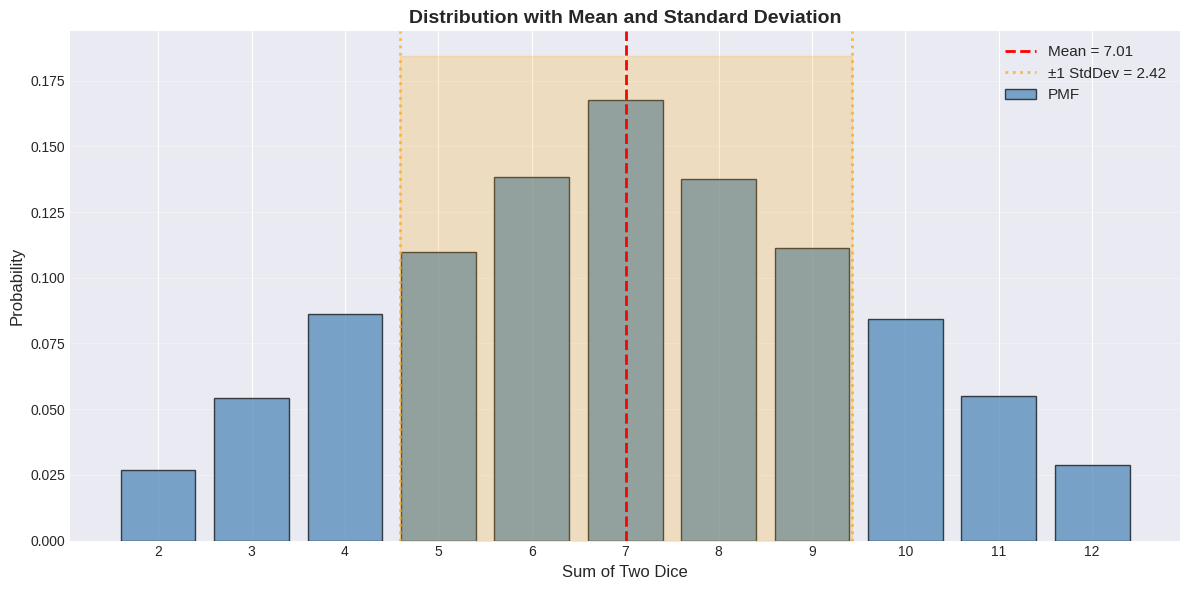

In [14]:
# Visualize distribution with mean and std dev
fig, ax = plt.subplots(figsize=(12, 6))

# Plot histogram
values, counts = np.unique(X, return_counts=True)
pmf = counts / n_rolls

bars = ax.bar(values, pmf, alpha=0.7, color='steelblue', edgecolor='black', label='PMF')

# Mark mean
ax.axvline(mean_empirical, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_empirical:.2f}')

# Mark one standard deviation
ax.axvline(mean_empirical - std_empirical, color='orange', linestyle=':', linewidth=2, alpha=0.7)
ax.axvline(mean_empirical + std_empirical, color='orange', linestyle=':', linewidth=2, alpha=0.7,
          label=f'±1 StdDev = {std_empirical:.2f}')

# Shade one std dev region
ax.fill_betweenx([0, max(pmf)*1.1], mean_empirical - std_empirical, mean_empirical + std_empirical,
                  alpha=0.2, color='orange')

ax.set_xlabel('Sum of Two Dice', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Distribution with Mean and Standard Deviation', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(values)

plt.tight_layout()
plt.show()

## 9. Common Discrete Distributions <a name="discrete-distributions"></a>

### 9.1 Bernoulli Distribution

Models a single trial with two outcomes (success/failure).

$$P(X = 1) = p, \quad P(X = 0) = 1-p$$

- $E[X] = p$
- $\text{Var}(X) = p(1-p)$

### 9.2 Binomial Distribution

Number of successes in $n$ independent Bernoulli trials.

$$P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$$

- $E[X] = np$
- $\text{Var}(X) = np(1-p)$

### 9.3 Poisson Distribution

Number of events occurring in a fixed interval.

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

- $E[X] = \lambda$
- $\text{Var}(X) = \lambda$

### 9.4 Geometric Distribution

Number of trials until first success.

$$P(X = k) = (1-p)^{k-1}p$$

- $E[X] = \frac{1}{p}$
- $\text{Var}(X) = \frac{1-p}{p^2}$

BINOMIAL DISTRIBUTION

Scenario: Flipping a fair coin 10 times
Question: What's the probability of getting exactly k heads?

Parameters: n=10, p=0.5
Theoretical mean: E[X] = np = 5.0
Empirical mean: 5.0040

Theoretical variance: Var(X) = np(1-p) = 2.5
Empirical variance: 2.4956


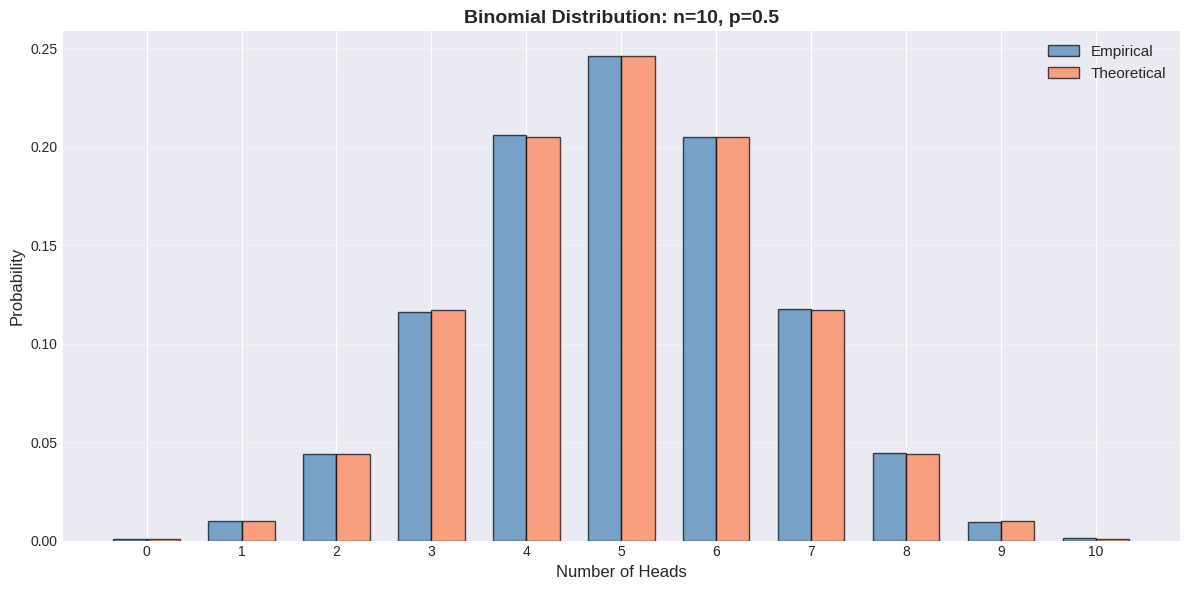

In [15]:
# Binomial Distribution Example
print("="*70)
print("BINOMIAL DISTRIBUTION")
print("="*70)
print("\nScenario: Flipping a fair coin 10 times")
print("Question: What's the probability of getting exactly k heads?")

n = 10  # number of trials
p = 0.5  # probability of success (heads)
n_experiments = 100000

# Simulate
results = np.random.binomial(n, p, n_experiments)

# Calculate empirical PMF
values, counts = np.unique(results, return_counts=True)
empirical_pmf = counts / n_experiments

# Theoretical PMF
k_values = np.arange(0, n+1)
theoretical_pmf = stats.binom.pmf(k_values, n, p)

print(f"\nParameters: n={n}, p={p}")
print(f"Theoretical mean: E[X] = np = {n*p}")
print(f"Empirical mean: {np.mean(results):.4f}")
print(f"\nTheoretical variance: Var(X) = np(1-p) = {n*p*(1-p)}")
print(f"Empirical variance: {np.var(results):.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(k_values))
width = 0.35

ax.bar(x_pos - width/2, [empirical_pmf[np.where(values == k)[0][0]] if k in values else 0 for k in k_values], 
       width, label='Empirical', alpha=0.7, color='steelblue', edgecolor='black')
ax.bar(x_pos + width/2, theoretical_pmf, width, label='Theoretical', 
       alpha=0.7, color='coral', edgecolor='black')

ax.set_xlabel('Number of Heads', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title(f'Binomial Distribution: n={n}, p={p}', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(k_values)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

POISSON DISTRIBUTION

Scenario: Customer arrivals at a store
Average rate: λ = 3 customers per minute

Parameter: λ = 3
Theoretical mean: E[X] = λ = 3
Empirical mean: 2.9976

Theoretical variance: Var(X) = λ = 3
Empirical variance: 2.9873

----------------------------------------------------------------------
Interesting Probabilities:
----------------------------------------------------------------------
P(X = 3): 0.2234 (most likely value)
P(X ≤ 2): 0.4231 (fewer than average)
P(X ≥ 5): 0.1835 (more than average)


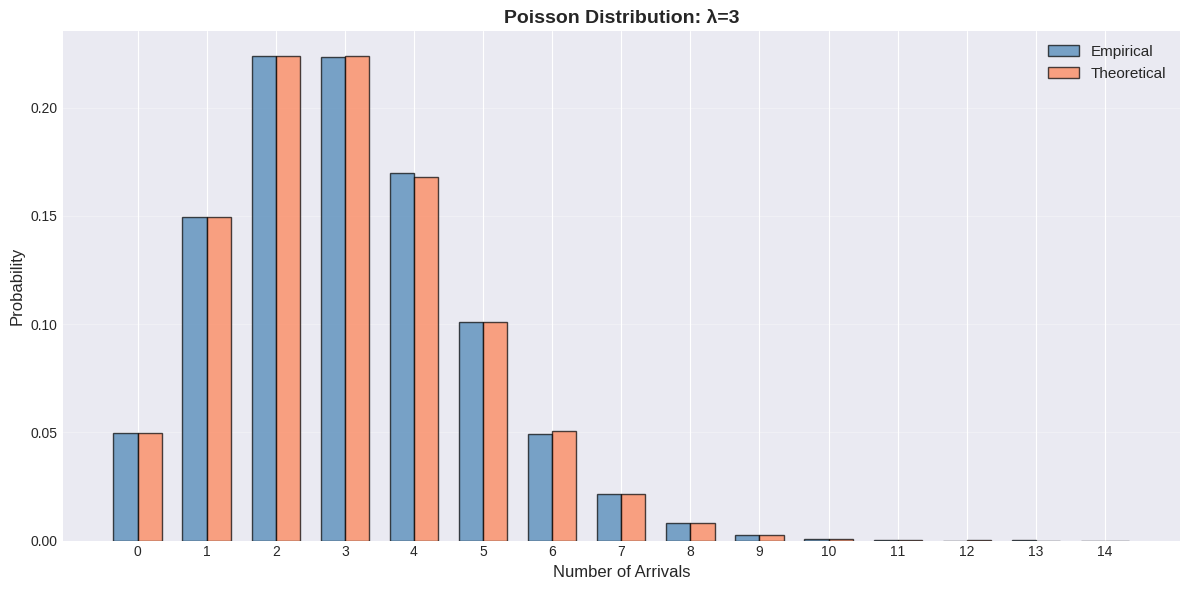

In [16]:
# Poisson Distribution Example
print("="*70)
print("POISSON DISTRIBUTION")
print("="*70)
print("\nScenario: Customer arrivals at a store")
print("Average rate: λ = 3 customers per minute")

lambda_param = 3  # average rate
n_minutes = 100000

# Simulate
arrivals = np.random.poisson(lambda_param, n_minutes)

# Calculate empirical PMF
values, counts = np.unique(arrivals, return_counts=True)
empirical_pmf = counts / n_minutes

# Theoretical PMF
k_values = np.arange(0, 15)
theoretical_pmf = stats.poisson.pmf(k_values, lambda_param)

print(f"\nParameter: λ = {lambda_param}")
print(f"Theoretical mean: E[X] = λ = {lambda_param}")
print(f"Empirical mean: {np.mean(arrivals):.4f}")
print(f"\nTheoretical variance: Var(X) = λ = {lambda_param}")
print(f"Empirical variance: {np.var(arrivals):.4f}")

# Calculate probabilities for interesting events
print("\n" + "-"*70)
print("Interesting Probabilities:")
print("-"*70)
print(f"P(X = 3): {np.mean(arrivals == 3):.4f} (most likely value)")
print(f"P(X ≤ 2): {np.mean(arrivals <= 2):.4f} (fewer than average)")
print(f"P(X ≥ 5): {np.mean(arrivals >= 5):.4f} (more than average)")

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = k_values
width = 0.35

empirical_plot = [empirical_pmf[np.where(values == k)[0][0]] if k in values else 0 for k in k_values]
ax.bar(x_pos - width/2, empirical_plot, width, label='Empirical', 
       alpha=0.7, color='steelblue', edgecolor='black')
ax.bar(x_pos + width/2, theoretical_pmf, width, label='Theoretical', 
       alpha=0.7, color='coral', edgecolor='black')

ax.set_xlabel('Number of Arrivals', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title(f'Poisson Distribution: λ={lambda_param}', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 10. Common Continuous Distributions <a name="continuous-distributions"></a>

### 10.1 Uniform Distribution

All values in $[a, b]$ are equally likely.

$$f(x) = \frac{1}{b-a} \text{ for } x \in [a,b]$$

- $E[X] = \frac{a+b}{2}$
- $\text{Var}(X) = \frac{(b-a)^2}{12}$

### 10.2 Exponential Distribution

Time until an event occurs (memoryless property).

$$f(x) = \lambda e^{-\lambda x} \text{ for } x \geq 0$$

- $E[X] = \frac{1}{\lambda}$
- $\text{Var}(X) = \frac{1}{\lambda^2}$

### 10.3 Normal (Gaussian) Distribution

The most important distribution in statistics!

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- $E[X] = \mu$
- $\text{Var}(X) = \sigma^2$

**68-95-99.7 Rule**:
- 68% of data within 1 standard deviation
- 95% within 2 standard deviations
- 99.7% within 3 standard deviations

NORMAL (GAUSSIAN) DISTRIBUTION

Parameters: μ=0, σ=1
Theoretical mean: 0
Empirical mean: -0.0049

Theoretical std dev: 1
Empirical std dev: 1.0015

----------------------------------------------------------------------
68-95-99.7 Rule Verification:
----------------------------------------------------------------------
Within 1σ: 68.07% (expected: 68%)
Within 2σ: 95.42% (expected: 95%)
Within 3σ: 99.74% (expected: 99.7%)


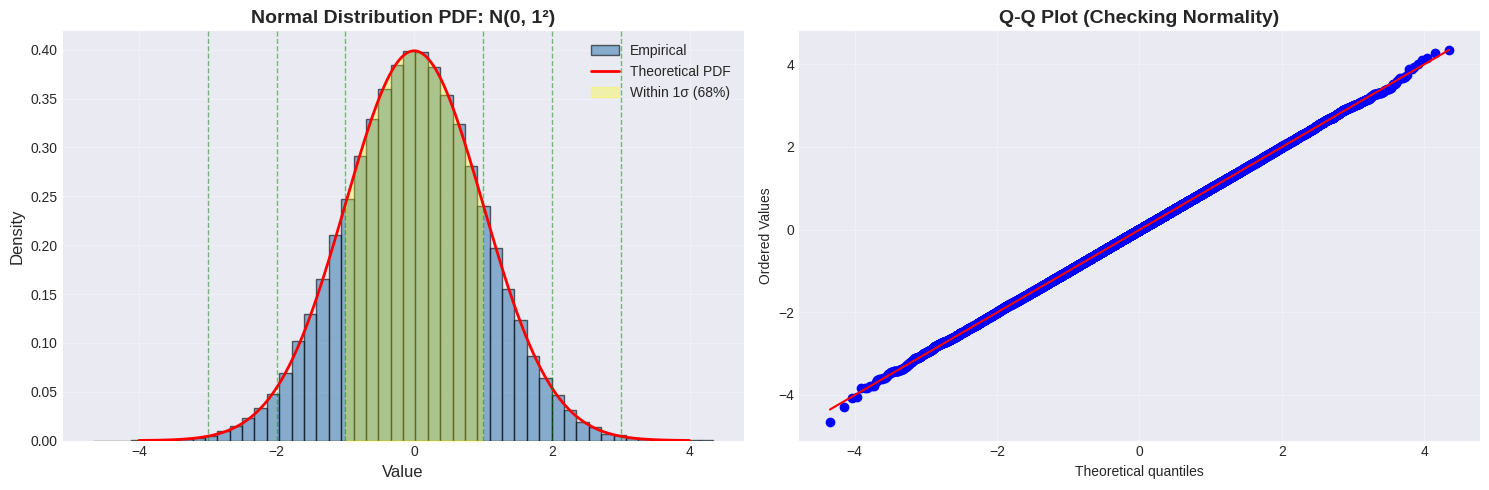

In [17]:
# Normal Distribution
print("="*70)
print("NORMAL (GAUSSIAN) DISTRIBUTION")
print("="*70)

mu = 0  # mean
sigma = 1  # standard deviation
n_samples = 100000

# Generate samples
samples = np.random.normal(mu, sigma, n_samples)

print(f"\nParameters: μ={mu}, σ={sigma}")
print(f"Theoretical mean: {mu}")
print(f"Empirical mean: {np.mean(samples):.4f}")
print(f"\nTheoretical std dev: {sigma}")
print(f"Empirical std dev: {np.std(samples):.4f}")

# Test 68-95-99.7 rule
within_1sigma = np.mean(np.abs(samples - mu) <= sigma)
within_2sigma = np.mean(np.abs(samples - mu) <= 2*sigma)
within_3sigma = np.mean(np.abs(samples - mu) <= 3*sigma)

print("\n" + "-"*70)
print("68-95-99.7 Rule Verification:")
print("-"*70)
print(f"Within 1σ: {within_1sigma:.2%} (expected: 68%)")
print(f"Within 2σ: {within_2sigma:.2%} (expected: 95%)")
print(f"Within 3σ: {within_3sigma:.2%} (expected: 99.7%)")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PDF
ax = axes[0]
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

ax.hist(samples, bins=50, density=True, alpha=0.6, color='steelblue', 
       edgecolor='black', label='Empirical')
ax.plot(x, pdf, 'r-', linewidth=2, label='Theoretical PDF')

# Mark standard deviations
for i in range(1, 4):
    ax.axvline(mu + i*sigma, color='green', linestyle='--', alpha=0.5, linewidth=1)
    ax.axvline(mu - i*sigma, color='green', linestyle='--', alpha=0.5, linewidth=1)

# Shade 1-sigma region
x_fill = x[(x >= mu - sigma) & (x <= mu + sigma)]
ax.fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), alpha=0.3, color='yellow',
               label='Within 1σ (68%)')

ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Normal Distribution PDF: N({mu}, {sigma}²)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# QQ plot to check normality
ax = axes[1]
stats.probplot(samples, dist="norm", plot=ax)
ax.set_title('Q-Q Plot (Checking Normality)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

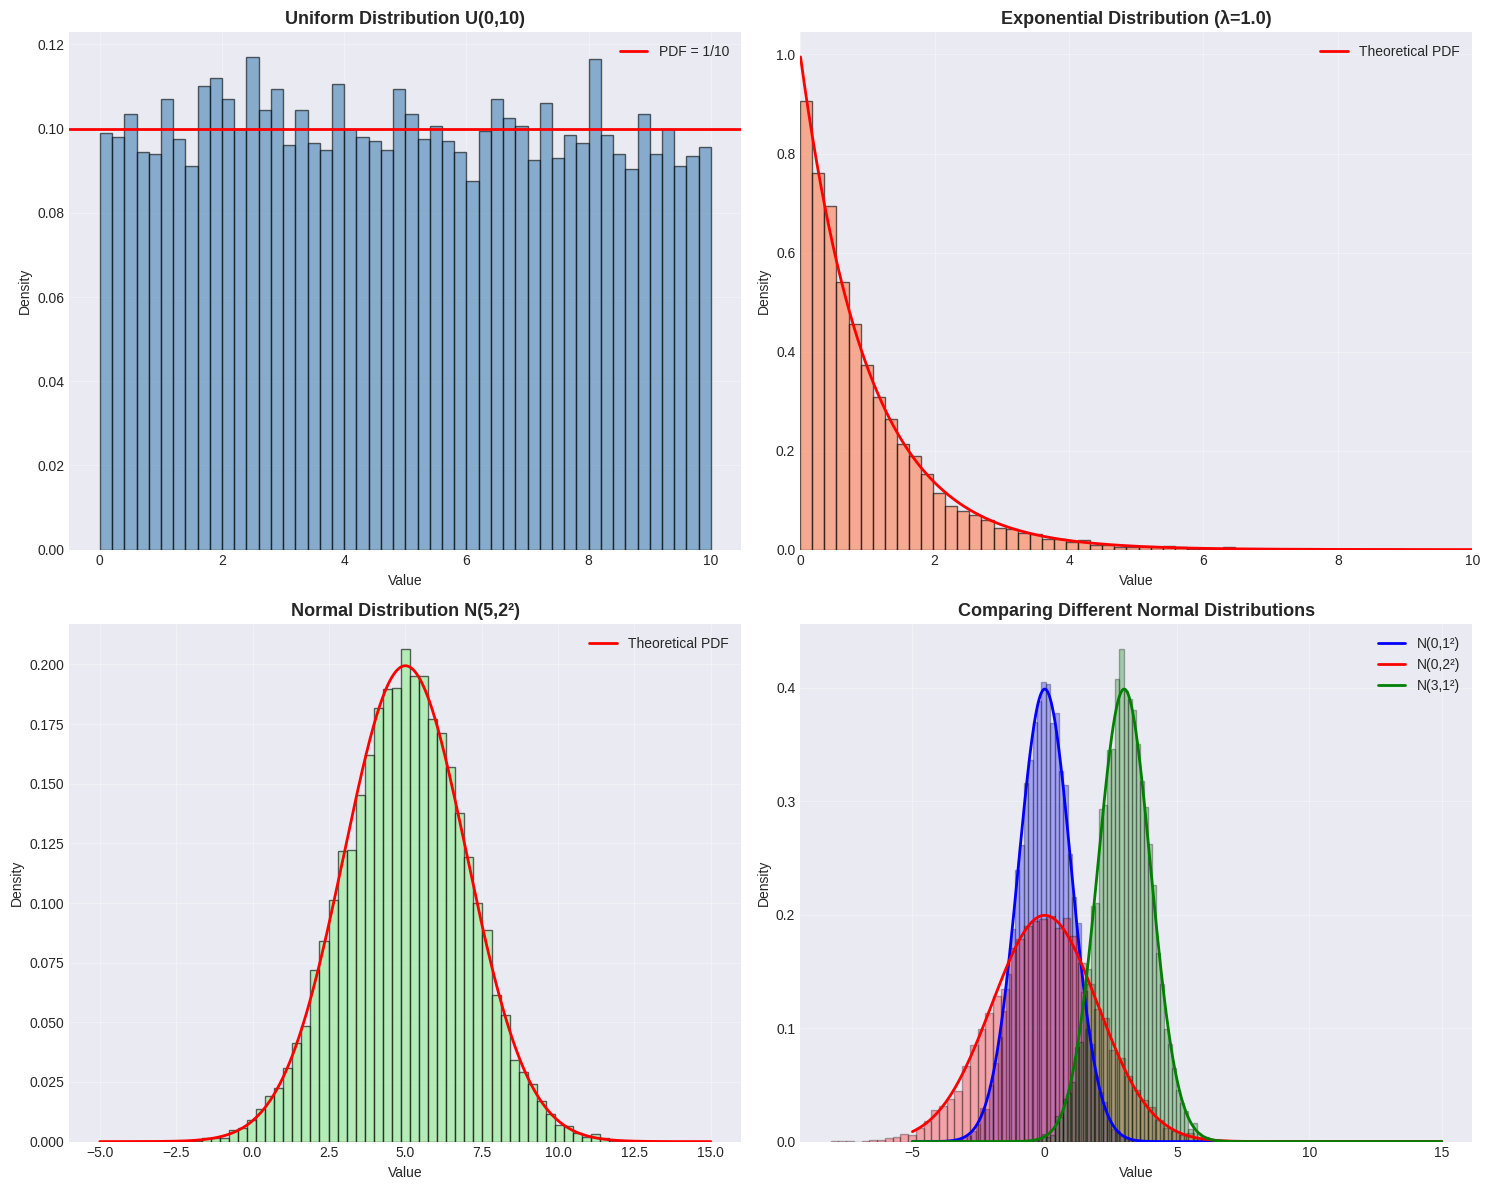

In [18]:
# Compare different distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

n_samples = 10000
x_range = np.linspace(-5, 15, 1000)

# Uniform
ax = axes[0, 0]
a, b = 0, 10
uniform_samples = np.random.uniform(a, b, n_samples)
ax.hist(uniform_samples, bins=50, density=True, alpha=0.6, color='steelblue', edgecolor='black')
ax.axhline(1/(b-a), color='r', linewidth=2, label=f'PDF = 1/{b-a}')
ax.set_title(f'Uniform Distribution U({a},{b})', fontsize=13, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

# Exponential
ax = axes[0, 1]
lambda_exp = 1.0
exp_samples = np.random.exponential(1/lambda_exp, n_samples)
x_exp = x_range[x_range >= 0]
ax.hist(exp_samples, bins=50, density=True, alpha=0.6, color='coral', edgecolor='black')
ax.plot(x_exp, stats.expon.pdf(x_exp, scale=1/lambda_exp), 'r-', linewidth=2, label='Theoretical PDF')
ax.set_title(f'Exponential Distribution (λ={lambda_exp})', fontsize=13, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 10)

# Normal
ax = axes[1, 0]
mu, sigma = 5, 2
normal_samples = np.random.normal(mu, sigma, n_samples)
ax.hist(normal_samples, bins=50, density=True, alpha=0.6, color='lightgreen', edgecolor='black')
ax.plot(x_range, stats.norm.pdf(x_range, mu, sigma), 'r-', linewidth=2, label='Theoretical PDF')
ax.set_title(f'Normal Distribution N({mu},{sigma}²)', fontsize=13, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

# Multiple Normals (different parameters)
ax = axes[1, 1]
params = [(0, 1), (0, 2), (3, 1)]
colors = ['blue', 'red', 'green']
for (mu, sigma), color in zip(params, colors):
    samples = np.random.normal(mu, sigma, n_samples)
    ax.hist(samples, bins=50, density=True, alpha=0.3, color=color, edgecolor='black')
    ax.plot(x_range, stats.norm.pdf(x_range, mu, sigma), color=color, 
           linewidth=2, label=f'N({mu},{sigma}²)')
ax.set_title('Comparing Different Normal Distributions', fontsize=13, fontweight='bold')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 11. Central Limit Theorem <a name="clt"></a>

### The Theorem

The **Central Limit Theorem** (CLT) is one of the most important theorems in probability:

**Statement**: For independent random variables $X_1, X_2, ..., X_n$ with mean $\mu$ and variance $\sigma^2$, the sum (or average) approaches a normal distribution as $n \to \infty$:

$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \xrightarrow{d} N(0, 1)$$

### Why It Matters

1. **Explains why normal distribution appears everywhere**: Many phenomena are sums of many small effects
2. **Justifies statistical inference**: Sample means are approximately normal
3. **Works for any distribution**: Doesn't matter if $X_i$ are uniform, exponential, etc.

### Key Points

- Works even if original distribution is NOT normal
- "Large" $n$ typically means $n \geq 30$
- Convergence faster for symmetric distributions

CENTRAL LIMIT THEOREM DEMONSTRATION

Original distribution: Uniform (single die roll)
Question: What happens to the average of n dice rolls as n increases?


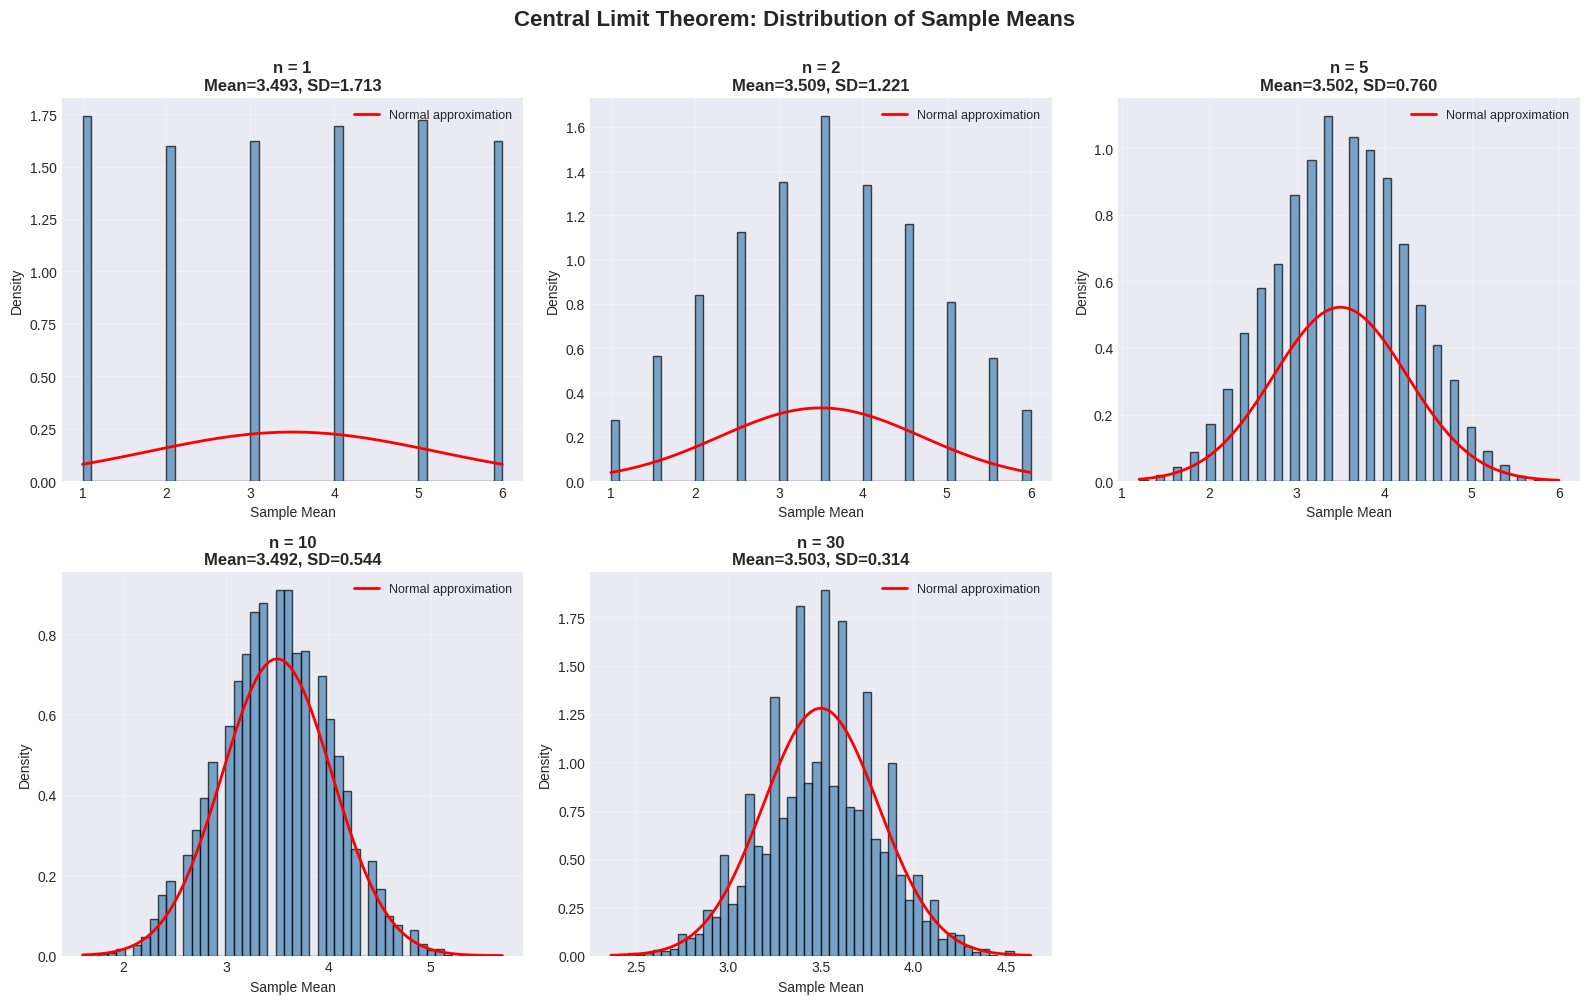


OBSERVATION:
As n increases, the distribution of sample means:
1. Becomes more bell-shaped (approaches normal distribution)
2. Centers around the true mean (μ = 3.5)
3. Has smaller variance (σ/√n decreases)

This holds even though the original distribution (single die) is uniform!


In [19]:
# Demonstrate CLT with dice rolls
print("="*70)
print("CENTRAL LIMIT THEOREM DEMONSTRATION")
print("="*70)
print("\nOriginal distribution: Uniform (single die roll)")
print("Question: What happens to the average of n dice rolls as n increases?")

def sample_means(original_dist_fn, n_samples, sample_size):
    """
    Generate sample means from any distribution.
    """
    means = []
    for _ in range(n_samples):
        sample = original_dist_fn(sample_size)
        means.append(np.mean(sample))
    return np.array(means)

# Original distribution: single die roll
def roll_dice(n):
    return np.random.randint(1, 7, n)

n_samples = 10000
sample_sizes = [1, 2, 5, 10, 30]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, n in enumerate(sample_sizes):
    ax = axes[idx]
    
    # Generate sample means
    means = sample_means(roll_dice, n_samples, n)
    
    # Plot histogram
    ax.hist(means, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
    
    # Overlay theoretical normal distribution
    mu_theory = 3.5  # mean of single die
    sigma_theory = np.sqrt((35/12) / n)  # std of mean of n dice
    
    x = np.linspace(means.min(), means.max(), 100)
    ax.plot(x, stats.norm.pdf(x, mu_theory, sigma_theory), 'r-', 
           linewidth=2, label='Normal approximation')
    
    ax.set_title(f'n = {n}\nMean={np.mean(means):.3f}, SD={np.std(means):.3f}', 
                fontsize=12, fontweight='bold')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

# Hide last subplot
axes[5].axis('off')

fig.suptitle('Central Limit Theorem: Distribution of Sample Means', 
            fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("OBSERVATION:")
print("="*70)
print("As n increases, the distribution of sample means:")
print("1. Becomes more bell-shaped (approaches normal distribution)")
print("2. Centers around the true mean (μ = 3.5)")
print("3. Has smaller variance (σ/√n decreases)")
print("\nThis holds even though the original distribution (single die) is uniform!")

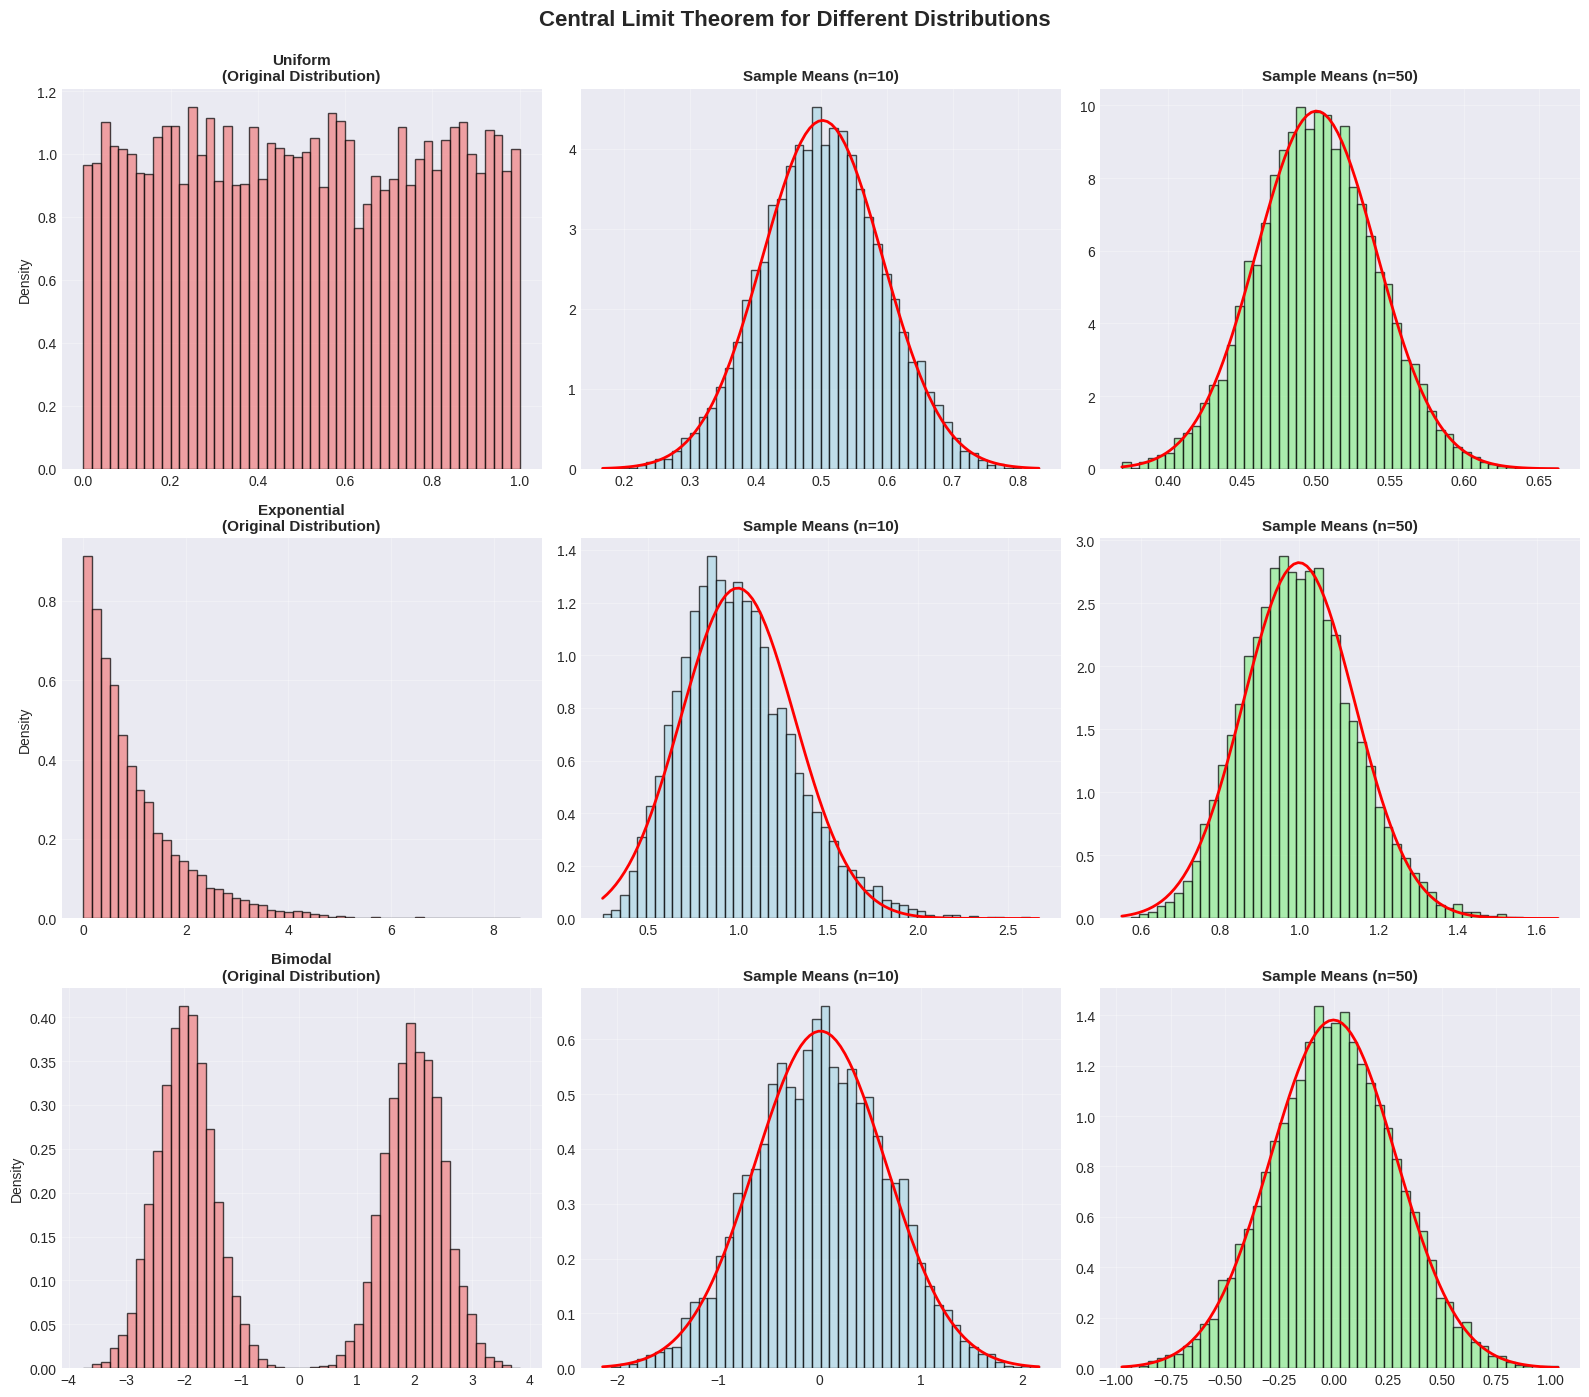

Key Insight: Regardless of the original distribution's shape,
the distribution of sample means becomes approximately normal!


In [20]:
# CLT with different original distributions
def exponential_samples(n):
    return np.random.exponential(1, n)

def bimodal_samples(n):
    """Create a bimodal distribution (mixture of two normals)."""
    if np.random.rand() < 0.5:
        return np.random.normal(-2, 0.5, n)
    else:
        return np.random.normal(2, 0.5, n)

distributions = [
    ("Uniform", lambda n: np.random.uniform(0, 1, n)),
    ("Exponential", exponential_samples),
    ("Bimodal", lambda n: np.array([bimodal_samples(1)[0] for _ in range(n)]))
]

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
n_samples = 10000

for row, (dist_name, dist_fn) in enumerate(distributions):
    # Show original distribution
    ax = axes[row, 0]
    original_samples = dist_fn(n_samples)
    ax.hist(original_samples, bins=50, density=True, alpha=0.7, 
           color='lightcoral', edgecolor='black')
    ax.set_title(f'{dist_name}\n(Original Distribution)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Density')
    ax.grid(True, alpha=0.3)
    
    # Show sample means for n=10
    ax = axes[row, 1]
    means_10 = sample_means(dist_fn, n_samples, 10)
    ax.hist(means_10, bins=50, density=True, alpha=0.7, 
           color='lightblue', edgecolor='black')
    x = np.linspace(means_10.min(), means_10.max(), 100)
    ax.plot(x, stats.norm.pdf(x, np.mean(means_10), np.std(means_10)), 
           'r-', linewidth=2)
    ax.set_title(f'Sample Means (n=10)', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Show sample means for n=50
    ax = axes[row, 2]
    means_50 = sample_means(dist_fn, n_samples, 50)
    ax.hist(means_50, bins=50, density=True, alpha=0.7, 
           color='lightgreen', edgecolor='black')
    x = np.linspace(means_50.min(), means_50.max(), 100)
    ax.plot(x, stats.norm.pdf(x, np.mean(means_50), np.std(means_50)), 
           'r-', linewidth=2)
    ax.set_title(f'Sample Means (n=50)', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

fig.suptitle('Central Limit Theorem for Different Distributions', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Key Insight: Regardless of the original distribution's shape,")
print("the distribution of sample means becomes approximately normal!")

## 12. Monte Carlo Simulation <a name="monte-carlo"></a>

### What is Monte Carlo?

**Monte Carlo methods** use repeated random sampling to solve problems that might be deterministic in principle.

### Applications

1. **Estimating π**: Randomly throw darts at a square, count how many land in inscribed circle
2. **Integration**: Estimate area under curves
3. **Risk analysis**: Model financial portfolios
4. **Physics simulations**: Particle interactions
5. **Machine learning**: Bayesian inference

### Basic Idea

1. Define a domain of possible inputs
2. Generate random inputs from the domain
3. Perform computation on inputs
4. Aggregate results

In [21]:
# Monte Carlo: Estimating π
print("="*70)
print("MONTE CARLO SIMULATION: Estimating π")
print("="*70)
print("\nMethod: Randomly throw darts at a square with inscribed circle")
print("Ratio of points inside circle to total points ≈ π/4")

def estimate_pi(n_points):
    """
    Estimate π using Monte Carlo method.
    """
    # Generate random points in [0,1] x [0,1]
    x = np.random.uniform(0, 1, n_points)
    y = np.random.uniform(0, 1, n_points)
    
    # Check if points are inside quarter circle
    inside_circle = (x**2 + y**2) <= 1
    
    # Estimate π
    pi_estimate = 4 * np.sum(inside_circle) / n_points
    
    return pi_estimate, x, y, inside_circle

# Try different sample sizes
sample_sizes = [100, 1000, 10000, 100000, 1000000]

print("\nSample Size | π Estimate | Error      | Error %")
print("-" * 60)

estimates = []
for n in sample_sizes:
    pi_est, _, _, _ = estimate_pi(n)
    error = abs(pi_est - np.pi)
    error_pct = error / np.pi * 100
    estimates.append(pi_est)
    print(f"{n:11,} | {pi_est:10.6f} | {error:10.6f} | {error_pct:6.3f}%")

print(f"\nTrue value of π: {np.pi:.10f}")

MONTE CARLO SIMULATION: Estimating π

Method: Randomly throw darts at a square with inscribed circle
Ratio of points inside circle to total points ≈ π/4

Sample Size | π Estimate | Error      | Error %
------------------------------------------------------------
        100 |   3.200000 |   0.058407 |  1.859%
      1,000 |   3.112000 |   0.029593 |  0.942%
     10,000 |   3.122400 |   0.019193 |  0.611%
    100,000 |   3.144200 |   0.002607 |  0.083%
  1,000,000 |   3.138800 |   0.002793 |  0.089%

True value of π: 3.1415926536


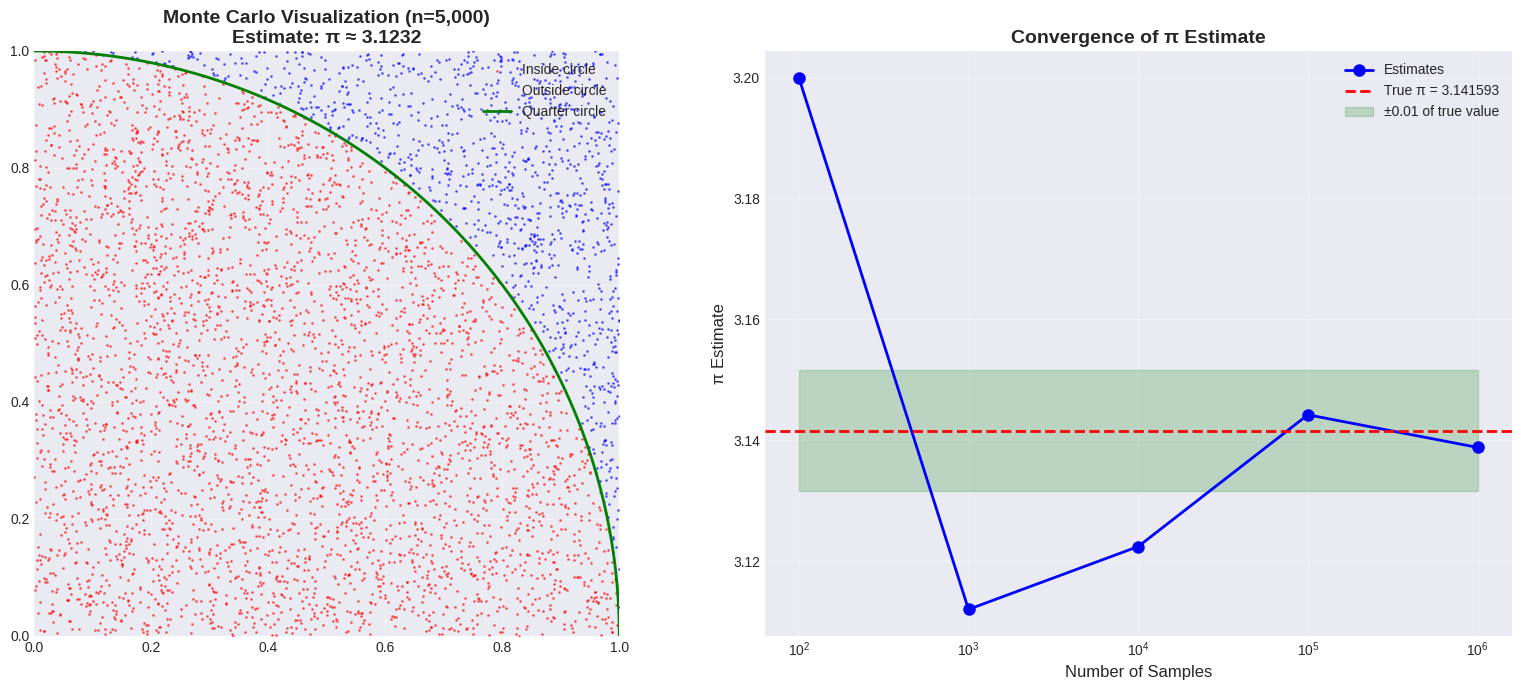

In [22]:
# Visualize Monte Carlo for π
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Scatter plot of points
ax = axes[0]
n_visual = 5000
pi_est, x, y, inside = estimate_pi(n_visual)

ax.scatter(x[inside], y[inside], c='red', s=1, alpha=0.5, label='Inside circle')
ax.scatter(x[~inside], y[~inside], c='blue', s=1, alpha=0.5, label='Outside circle')

# Draw quarter circle
theta = np.linspace(0, np.pi/2, 100)
ax.plot(np.cos(theta), np.sin(theta), 'g-', linewidth=2, label='Quarter circle')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_title(f'Monte Carlo Visualization (n={n_visual:,})\nEstimate: π ≈ {pi_est:.4f}', 
            fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

# Convergence plot
ax = axes[1]
ax.semilogx(sample_sizes, estimates, 'bo-', linewidth=2, markersize=8, label='Estimates')
ax.axhline(y=np.pi, color='r', linestyle='--', linewidth=2, label=f'True π = {np.pi:.6f}')
ax.fill_between(sample_sizes, np.pi - 0.01, np.pi + 0.01, alpha=0.2, color='green',
               label='±0.01 of true value')
ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_ylabel('π Estimate', fontsize=12)
ax.set_title('Convergence of π Estimate', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 13. Real-World Applications <a name="applications"></a>

### Application 1: Birthday Paradox

**Problem**: In a room of $n$ people, what's the probability that at least two share a birthday?

**Surprising result**: With just 23 people, probability > 50%!

In [23]:
# Birthday Paradox
def birthday_paradox_simulation(n_people, n_simulations=10000):
    """
    Simulate birthday paradox.
    """
    matches = 0
    
    for _ in range(n_simulations):
        # Generate random birthdays (1-365)
        birthdays = np.random.randint(1, 366, n_people)
        
        # Check if any duplicates
        if len(birthdays) != len(set(birthdays)):
            matches += 1
    
    return matches / n_simulations

print("="*70)
print("BIRTHDAY PARADOX")
print("="*70)

# Theoretical calculation
def theoretical_birthday_prob(n):
    """Calculate theoretical probability."""
    if n > 365:
        return 1.0
    prob_no_match = 1.0
    for i in range(n):
        prob_no_match *= (365 - i) / 365
    return 1 - prob_no_match

# Test different room sizes
room_sizes = [10, 20, 23, 30, 40, 50, 70]

print("\nPeople | Simulated | Theoretical | Difference")
print("-" * 60)

for n in room_sizes:
    sim_prob = birthday_paradox_simulation(n, 10000)
    theory_prob = theoretical_birthday_prob(n)
    diff = abs(sim_prob - theory_prob)
    print(f"  {n:2d}   |  {sim_prob:.4f}   |   {theory_prob:.4f}    |  {diff:.6f}")

# Find where probability crosses 50%
for n in range(1, 100):
    if theoretical_birthday_prob(n) > 0.5:
        print(f"\n✓ With just {n} people, there's a >50% chance of a shared birthday!")
        break

BIRTHDAY PARADOX

People | Simulated | Theoretical | Difference
------------------------------------------------------------
  10   |  0.1166   |   0.1169    |  0.000348
  20   |  0.4157   |   0.4114    |  0.004262
  23   |  0.5139   |   0.5073    |  0.006603
  30   |  0.7091   |   0.7063    |  0.002784
  40   |  0.8822   |   0.8912    |  0.009032
  50   |  0.9745   |   0.9704    |  0.004126
  70   |  0.9985   |   0.9992    |  0.000660

✓ With just 23 people, there's a >50% chance of a shared birthday!


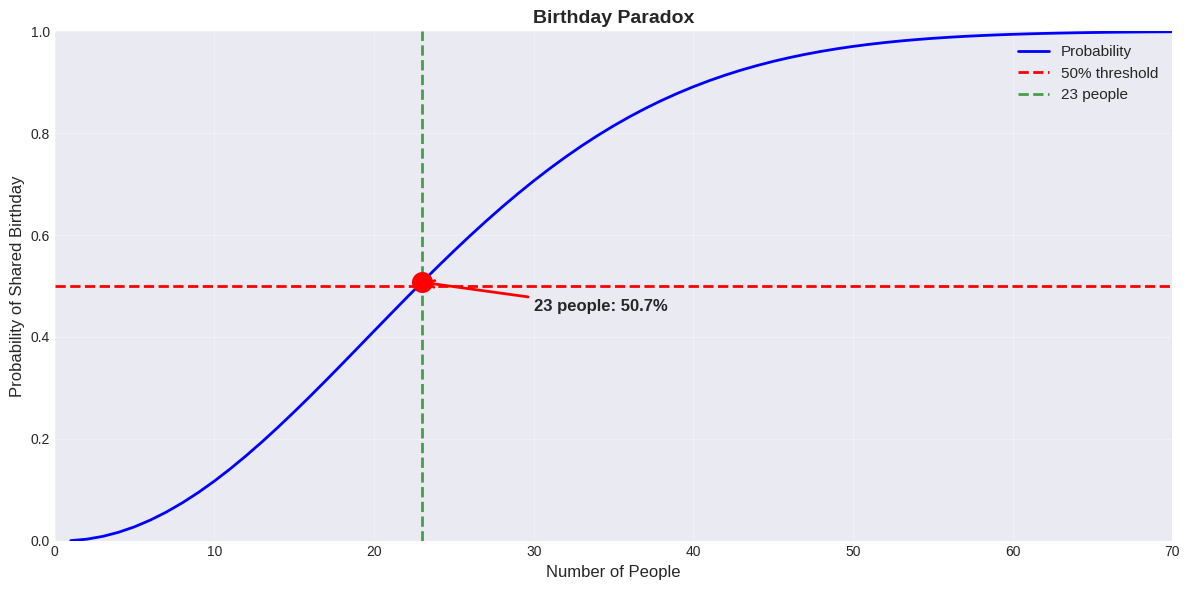

In [24]:
# Visualize Birthday Paradox
people_range = np.arange(1, 71)
probabilities = [theoretical_birthday_prob(n) for n in people_range]

plt.figure(figsize=(12, 6))
plt.plot(people_range, probabilities, 'b-', linewidth=2, label='Probability')
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='50% threshold')
plt.axvline(x=23, color='g', linestyle='--', linewidth=2, alpha=0.7, label='23 people')

# Highlight the 50% crossing point
plt.scatter([23], [theoretical_birthday_prob(23)], color='red', s=200, zorder=5)
plt.annotate(f'23 people: {theoretical_birthday_prob(23):.1%}', 
            xy=(23, theoretical_birthday_prob(23)), 
            xytext=(30, 0.45),
            fontsize=12, fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

plt.xlabel('Number of People', fontsize=12)
plt.ylabel('Probability of Shared Birthday', fontsize=12)
plt.title('Birthday Paradox', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, 70)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

### Application 2: Random Walk (Stock Price Model)

A **random walk** is a path consisting of random steps. Often used to model:
- Stock prices
- Particle diffusion
- Brownian motion

In [25]:
# Random Walk Simulation
def random_walk(n_steps, p_up=0.5):
    """
    Simulate a random walk.
    
    Parameters:
    - n_steps: number of steps
    - p_up: probability of moving up (vs down)
    """
    steps = np.random.choice([1, -1], size=n_steps, p=[p_up, 1-p_up])
    position = np.cumsum(steps)
    position = np.insert(position, 0, 0)  # Start at 0
    return position

print("="*70)
print("RANDOM WALK SIMULATION")
print("="*70)
print("\nSimulating stock price movements as a random walk")

# Parameters
n_steps = 1000
n_simulations = 100
initial_price = 100
step_size = 1  # Dollar movement per step

# Run multiple simulations
walks = []
for _ in range(n_simulations):
    walk = random_walk(n_steps)
    price = initial_price + walk * step_size
    walks.append(price)

walks = np.array(walks)

# Statistics
final_prices = walks[:, -1]
print(f"\nInitial price: ${initial_price}")
print(f"After {n_steps} steps:")
print(f"  Mean final price: ${np.mean(final_prices):.2f}")
print(f"  Std final price: ${np.std(final_prices):.2f}")
print(f"  Min final price: ${np.min(final_prices):.2f}")
print(f"  Max final price: ${np.max(final_prices):.2f}")

RANDOM WALK SIMULATION

Simulating stock price movements as a random walk

Initial price: $100
After 1000 steps:
  Mean final price: $97.00
  Std final price: $30.37
  Min final price: $4.00
  Max final price: $176.00


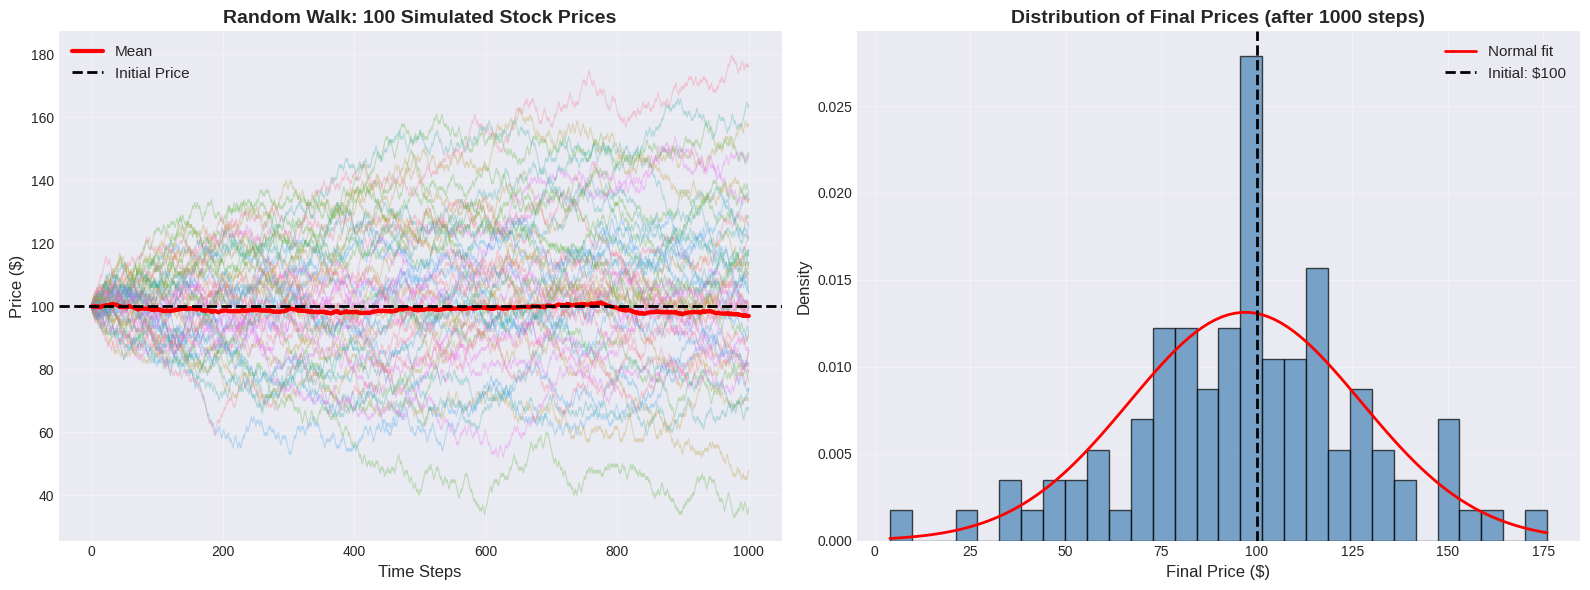

In [26]:
# Visualize random walks
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot multiple walks
ax = axes[0]
time_steps = np.arange(len(walks[0]))
for walk in walks[:50]:  # Plot first 50
    ax.plot(time_steps, walk, alpha=0.3, linewidth=0.8)

# Plot mean
mean_walk = np.mean(walks, axis=0)
ax.plot(time_steps, mean_walk, 'r-', linewidth=3, label='Mean')
ax.axhline(y=initial_price, color='black', linestyle='--', linewidth=2, label='Initial Price')

ax.set_xlabel('Time Steps', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.set_title(f'Random Walk: {n_simulations} Simulated Stock Prices', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Distribution of final prices
ax = axes[1]
ax.hist(final_prices, bins=30, density=True, alpha=0.7, 
       color='steelblue', edgecolor='black')

# Overlay normal distribution
x = np.linspace(final_prices.min(), final_prices.max(), 100)
ax.plot(x, stats.norm.pdf(x, np.mean(final_prices), np.std(final_prices)),
       'r-', linewidth=2, label='Normal fit')

ax.axvline(initial_price, color='black', linestyle='--', linewidth=2, 
          label=f'Initial: ${initial_price}')
ax.set_xlabel('Final Price ($)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Distribution of Final Prices (after {n_steps} steps)', 
            fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary and Key Takeaways

### Fundamental Concepts
1. **Probability**: Measure of likelihood, ranges from 0 to 1
2. **Sample Space**: Set of all possible outcomes
3. **Events**: Subsets of the sample space
4. **Random Variables**: Functions mapping outcomes to numbers

### Key Theorems
1. **Bayes' Theorem**: Update beliefs with new evidence
   - $P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$
   
2. **Central Limit Theorem**: Sample means approach normal distribution
   - Explains why normal distribution is ubiquitous
   
3. **Law of Large Numbers**: Sample average converges to expected value

### Important Distributions
**Discrete**:
- Binomial: Number of successes in $n$ trials
- Poisson: Number of events in fixed interval
- Geometric: Trials until first success

**Continuous**:
- Normal: Bell curve, most important distribution
- Exponential: Time between events
- Uniform: All values equally likely

### Practical Applications
1. **Statistics**: Hypothesis testing, confidence intervals
2. **Machine Learning**: Probabilistic models, Bayesian inference
3. **Finance**: Risk management, option pricing
4. **Science**: Experimental design, measurement uncertainty
5. **Games**: Optimal strategies, expected payoffs

### Key Skills Developed
- Computing probabilities analytically and through simulation
- Understanding conditional probability and independence
- Working with probability distributions
- Applying Bayes' theorem to real problems
- Using Monte Carlo methods

---

## Further Reading
- Sheldon Ross: "A First Course in Probability"
- Bertsekas & Tsitsiklis: "Introduction to Probability"
- 3Blue1Brown: Probability playlist on YouTube
- Khan Academy: Probability and Statistics

## Practice Problems
1. Calculate probabilities for card games and dice
2. Solve real-world problems using Bayes' theorem
3. Simulate random processes with Monte Carlo
4. Identify and work with different probability distributions
5. Apply CLT to understand sampling distributions